#1. TensorFlow 2 quickstart for beginners

In [0]:
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals
# the future module is actually used for python 2.x 
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
# Load and prepare the MNIST dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Convert the samples from integers to floating-point numbers
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# Build the tf.keras.Sequential model by stacking layers. 
# Choose an optimizer and loss function for training.
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10)
])
# The Flatten layer is a utility layer that flattens an input of shape n * c * h * w to a simple vector output of shape n * (c*h*w)

In [0]:
# For each example the model returns a vector of 'logits' or 'log-odds' scores, one for each class. 
predictions = model(x_train[:1]).numpy()
predictions


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[ 0.32489306,  0.48646927, -0.28705427, -0.04187691,  0.5686884 ,
        -1.0200717 ,  0.20477997,  0.06824523, -0.17434219, -0.07253088]],
      dtype=float32)

In [0]:
# The tf.nn.softmax function converts these logits to probabilities for each class:
tf.nn.softmax(predictions).numpy()
# It is possible to bake this softmax in as the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is
# discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output. 

array([[0.12679476, 0.14902975, 0.06876002, 0.08786484, 0.16180065,
        0.03303623, 0.11244415, 0.09809357, 0.07696375, 0.0852123 ]],
      dtype=float32)

In [0]:
# The losses.SparseCategoricalCrossentropy loss takes a vector of logits and a True index and returns a scalar loss for each example
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

3.4101505

In [0]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.2952 - accuracy: 0.9132
Epoch 2/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.1427 - accuracy: 0.9573
Epoch 3/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1071 - accuracy: 0.9674
Epoch 4/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0897 - accuracy: 0.9726
Epoch 5/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0751 - accuracy: 0.9763


#2: Basic classification: Classify images of clothing

In [1]:
%tensorflow_version 2.x
# keras is a high-level API to build and train models in TensorFlow.
from __future__ import absolute_import, division, print_function, unicode_literals
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


In [2]:
# Import the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# change the class name for better understanding
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##2.1. Explore the data

In [4]:
# Explore the data
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

##2.2. Preprocess the data

All the data must be preprocessed before training the network.

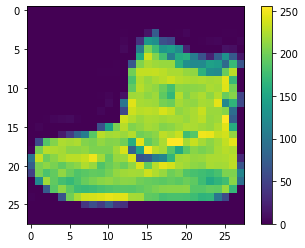

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

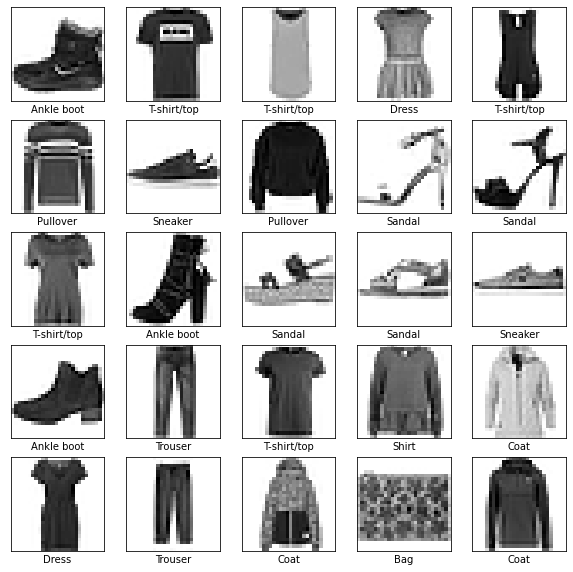

In [11]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1) # nrow, ncol, index, which starts with 1
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

##2.3. Build the model

In [0]:
# The basic building block of a neural network is the layer. Layers extract representations from the data fed into them.
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10)
])
# The Flatten layer transforms the format of the images from a two-dimensional array to a one-dimensional array. 
# This layer has no parameters to learn, it only reformats the data. 
# Dense layer or fully connected neural layers. 

##2.4. Compile the model

*   Loss function
*   Optimizer
*   Metrics

In [0]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
# Use this cross-entropy loss when there are two or more label classes, which is provided as integers.
# Using CategoricalCrossentropy loss for one-hot representation. 
# from_logits: whether y_pred is expected to be a logits tensor. By default, we assume that y_pred encodes a probability distribution. 
# Note: Using from_logits=True may be more numerically stable. 
# logits: a tensor with the unscaled log probabilities used to predict the labels with sigmoid(logits) --> raw prediction which should be passed through normalization function

##2.5. Train the model

In [14]:
# Feed the model
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.4965 - accuracy: 0.8255
Epoch 2/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3726 - accuracy: 0.8658
Epoch 3/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3351 - accuracy: 0.8776
Epoch 4/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.3101 - accuracy: 0.8863
Epoch 5/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2939 - accuracy: 0.8910
Epoch 6/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2778 - accuracy: 0.8961
Epoch 7/10
60000/60000 [==============================] - 10s 163us/sample - loss: 0.2671 - accuracy: 0.9008
Epoch 8/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2567 - accuracy: 0.9048
Epoch 9/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2460 - accuracy: 0.9076
Epoch 

In [18]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('\nTest accuracy: ', test_acc)
"""
It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset.
This gap between training accuracy and test accuracy represents overfitting. 
Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. 
An overfitted model memorizes the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. 
"""

10000/10000 [==============================] - 0s 38us/sample - loss: 0.3321 - accuracy: 0.8849

Test accuracy:  0.8849


In [0]:
# Make predictions
# Attach a softmax layer to convert the logits to probabilities
probability_model = tf.keras.Sequential([
                                         model, 
                                         tf.keras.layers.Softmax()
])

In [20]:
predictions = probability_model.predict(test_images)
predictions[0]

[3.9186245e-09 1.1383749e-12 2.1984570e-11 1.5919868e-11 1.1910933e-10
 1.7662028e-04 7.5281186e-09 5.3018662e-03 2.2814535e-09 9.9452150e-01]


In [21]:
# without normalization
model.predict(test_images)[0]

array([-12.440703 , -20.584597 , -17.623857 , -17.94663  , -15.934155 ,
        -1.7246853, -11.787799 ,   1.6771265, -12.981629 ,   6.9113293],
      dtype=float32)

In [22]:
np.argmax(predictions[0])
# the postion of the max

9

In [23]:
test_labels[0]

9

In [0]:
# Graph this to look at the full set of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

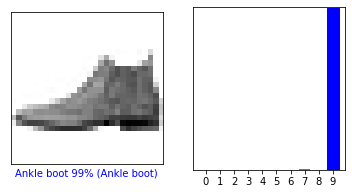

In [25]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

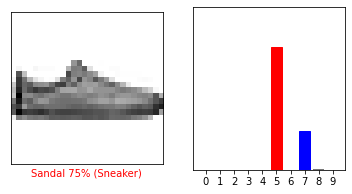

In [26]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

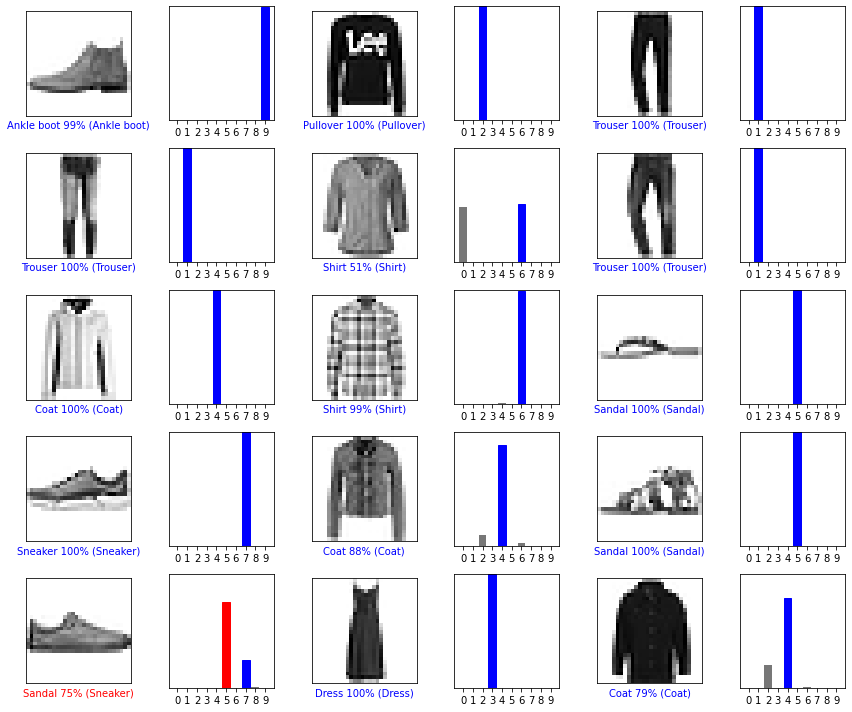

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

##2.6. Use the trained model

In [28]:
# Grab an image from the test dataset
img = test_images[1]
img.shape

(28, 28)

In [29]:
# tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. 
# Accordingly, even though you're using a single image, you need to add it to a list. 

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))
img.shape

(1, 28, 28)

In [30]:
# Now predict the correct label for this image.
predictions_single = probability_model.predict(img)
predictions_single

array([[9.7867098e-07, 3.1535799e-14, 9.9983704e-01, 1.7983132e-10,
        1.5258143e-04, 3.1641736e-13, 9.4136585e-06, 7.7963915e-18,
        1.2140738e-09, 5.6859678e-20]], dtype=float32)

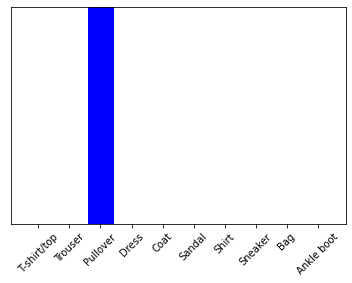

In [31]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [32]:
np.argmax(predictions_single[0])

2